# Stellar Spectral Classification Using Machine Learning

### 22RS046

In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

### Data preprocessing

In [2]:
# importing data from a csv file as a dataframe
df = pd.read_csv('spectral_data D and O to M.csv')

In [3]:
#displaying dataframe
display(df)

,teff,mbol,age,mass,radius,sptype
0,2971.6660,11.92,2.5,0.116,0.138246,M
1,2890.6800,12.32,8.5,0.102,0.121521,M
2,2511.8865,13.32,4.0,0.083,0.101543,M
3,2741.5742,12.65,8.5,0.095,0.116052,M
4,2930.8933,12.08,6.0,0.110,0.132024,M
...,...,...,...,...,...,...
42541,56623.9000,3.57,10.0,1.062,0.017809,D
42542,56623.9000,3.57,10.0,1.062,0.017809,D
42543,56623.9000,3.57,10.0,1.062,0.017809,D
42544,56623.9000,3.57,10.0,1.062,0.017809,D


**Abbreviations used:**

$t_{eff}\ (K)\ \ \ \ \ \ \ \ \ \rightarrow\ \ \$ Effective temperature of the star

$m_{bol}\ (M_{v})\ \ \ \ \ \ \rightarrow\ \ \$ Bolometric magnitude of the star

$age\ (Gyr)\ \  \ \ \ \ \rightarrow\ \ \$ Age of the star

$mass\ (M_{\odot})\ \ \ \ \rightarrow\ \ \$ Mass of the star

$radius\ (R_{\odot})\ \ \ \rightarrow\ \ \$ Radius of the star

$sptype\ \ \ \ \ \  \ \ \ \  \ \ \rightarrow\ \ \$ Spectral type of the star

data size = [42546, 6]

In [4]:
#checking for null data in the dataframe
df.isnull().sum()

teff      0
mbol      0
age       0
mass      0
radius    0
sptype    0
dtype: int64

The spectral classes for a star is represented by alphabets that is chiefly governed by the temperature and luminosity of the star. These alphabets are: {'O', 'B', 'A', 'F', 'G', 'K', 'M'} and {'D'}

|teff (K)|spectral class|
|--|--|
|>100000|D|
|30000 - 60000|O|
|10000 - 30000|B|
|7500 - 10000|A|
|6000 - 7500|F|
|5000 - 6000|G|
|3500 - 5000|K|
|<3500|M|

Here 'D' class stands for White Dwarf Stars (a type of dead star)

In [5]:
#encoding target labels of spectral class as numbers
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['sptype encode'] = labelencoder.fit_transform(df['sptype'])

[LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder.fit_transform)

**LabelEncoder().fit_transform** maps these *alphabets {'D', 'O', 'B', 'A', 'F', 'G', 'K', 'M'}* to a set of *numbers {0, 1, 2, 3, 4, 5, 6, 7}* and train the model with these numbers as target labels. We get these numbers as predictions for our inputs to the model. Those numbers can be mapped back to alphabets to get information on their spectral class.

In [6]:
#printing the mapping from alphabets to numbers for spectral classes
encoder_mapping = {index: label for index, label in enumerate(labelencoder.classes_)}
print(encoder_mapping)

{0: 'A', 1: 'B', 2: 'D', 3: 'F', 4: 'G', 5: 'K', 6: 'M', 7: 'O'}


In [7]:
#for example spectral class 'A' is mapped to number 0
encoder_mapping[0]

'A'

In [8]:
#displaying the data frame
display(df)

,teff,mbol,age,mass,radius,sptype,sptype encode
0,2971.6660,11.92,2.5,0.116,0.138246,M,6
1,2890.6800,12.32,8.5,0.102,0.121521,M,6
2,2511.8865,13.32,4.0,0.083,0.101543,M,6
3,2741.5742,12.65,8.5,0.095,0.116052,M,6
4,2930.8933,12.08,6.0,0.110,0.132024,M,6
...,...,...,...,...,...,...,...
42541,56623.9000,3.57,10.0,1.062,0.017809,D,2
42542,56623.9000,3.57,10.0,1.062,0.017809,D,2
42543,56623.9000,3.57,10.0,1.062,0.017809,D,2
42544,56623.9000,3.57,10.0,1.062,0.017809,D,2


It is visible in the above display that another column **'sptype encode'** has been introduced into the dataframe. Column **'sptype encode'** holds the information on spectral classes in form of encoded integers.

### Choosing feature and target labels for training our model

We are considering **teff, mbol, age, mass and radius** as *features* and **sptype encode** as *target labels* for our model.

In [9]:
#creating a separate dataframe for features only
features = df.drop(['sptype', 'sptype encode'], axis = 1)
display(features)

,teff,mbol,age,mass,radius
0,2971.6660,11.92,2.5,0.116,0.138246
1,2890.6800,12.32,8.5,0.102,0.121521
2,2511.8865,13.32,4.0,0.083,0.101543
3,2741.5742,12.65,8.5,0.095,0.116052
4,2930.8933,12.08,6.0,0.110,0.132024
...,...,...,...,...,...
42541,56623.9000,3.57,10.0,1.062,0.017809
42542,56623.9000,3.57,10.0,1.062,0.017809
42543,56623.9000,3.57,10.0,1.062,0.017809
42544,56623.9000,3.57,10.0,1.062,0.017809


### Analyzing the features

# ⚠️

Then cells in which seaborn is imported run them in the last. Otherwise it will affect the other plot styling done using matplotlib throughout the notebook.

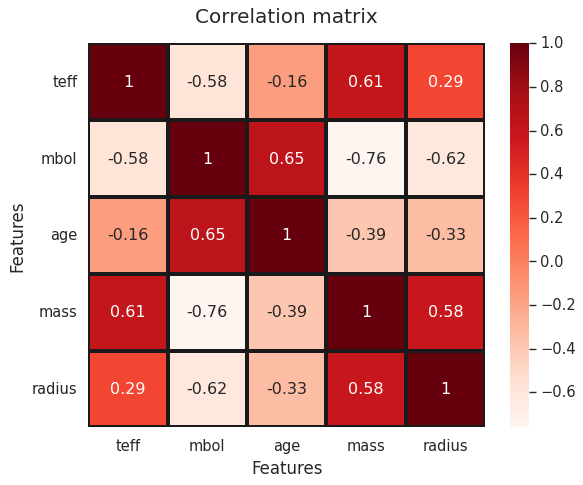

In [42]:
#Visualizing correlation among different features
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.2)

ax = sns.heatmap(features.corr(), annot = True, cmap = 'Reds', linewidth = 2, linecolor = 'k')
ax.set_xlabel('Features', fontsize = 15)
ax.set_ylabel('Features', fontsize = 15)
ax.set_title('Correlation matrix', fontsize = 18, y = 1.04)

plt.xticks(rotation = 0)
plt.yticks(rotation = 0)

# plt.savefig('Correlation matrix.pdf', bbox_inches = 'tight', dpi = 1500)
plt.show()

In [10]:
#creating a DataSeries out of 'sptype encode' as target labels
labels = df['sptype encode']
display(labels)

0        6
1        6
2        6
3        6
4        6
        ..
42541    2
42542    2
42543    2
42544    2
42545    2
Name: sptype encode, Length: 42546, dtype: int64

[train-test split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [11]:
# splitting data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features,
                                                            labels, test_size = 0.2)

In [12]:
#features for the model
train_features.head()

,teff,mbol,age,mass,radius
12146,5780.9604,5.09,4.000,0.901,0.848499
39943,30549.2100,-6.98,0.075,18.310,7.882270
15052,6338.6973,4.30,14.000,0.790,1.015433
34563,13963.6840,-0.90,0.075,3.715,2.294306
7972,4528.9756,6.76,4.000,0.706,0.640695


In [13]:
#labels for the model
train_labels.head()

12146    4
39943    1
15052    3
34563    1
7972     5
Name: sptype encode, dtype: int64

### Building and training a *[Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)* model

In [14]:
# Training a RandomForest Classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 10)
rf.fit(train_features, train_labels)

RandomForestClassifier(random_state=10)

For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the inidvidual trees is returned.

Therefore, data normalization won't affect the output for Random Forest Classifiers while it will affect the output for Random Forest regressors.

In [15]:
# Make prediction on the test features
predict = rf.predict(test_features)

### Calculating accuracy of the model

In [16]:
#Using mean as the metric for accuracy. Detail analysis has been done in the following sections
test_labels_array = test_labels.to_numpy()
test_labels_array = test_labels_array.reshape(-1, 1)
predict = predict.reshape(-1, 1)

accuracy = sum(test_labels_array == predict) / len(test_labels)

print('Accuracy = ', accuracy)
print(f'The model is {accuracy[0] * 100 : .2f} % accurate')

Accuracy =  [0.99976498]
The model is  99.98 % accurate


### Testing the model on unseen data

We create a new sample dataset purely based on the definition of spectral classes. The input data holds values for features for some stars and we make prediciton for spectral classes of these stars.

In [17]:
#new dataset
#White Dwarf Star, Sun, some cool M-type star, some  cool K-type star, some hot star, some hot star
test_teff   = [100000, 5777, 3500, 4300, 30000, 50000, 6500, 9000]
test_mbol   = [3, 4.74, 8, 6.5, -6, -7, 1, -0.1]
test_age    = [11, 4.5, 8.5, 5, 0.01, 0.05, 0.5, 0.3]
test_mass   = [1, 1, 0.4, 0.4, 20, 10, 1.5, 4]
test_radius = [0.03, 1, 0.2, 0.4, 6, 5, 2, 4]

In [18]:
#creating a dataframe for the input data
input_data = {'teff': test_teff,
              'mbol': test_mbol,
              'age': test_age,
              'mass': test_mass,
              'radius': test_radius}

df_input_data = pd.DataFrame(input_data)

display(df_input_data)

,teff,mbol,age,mass,radius
0,100000,3.00,11.00,1.0,0.03
1,5777,4.74,4.50,1.0,1.00
2,3500,8.00,8.50,0.4,0.20
3,4300,6.50,5.00,0.4,0.40
4,30000,-6.00,0.01,20.0,6.00
5,50000,-7.00,0.05,10.0,5.00
6,6500,1.00,0.50,1.5,2.00
7,9000,-0.10,0.30,4.0,4.00


In [19]:
#making prediction on this new data
prediction = rf.predict(df_input_data)

In [20]:
#displaying the prediction target labels along with the input features
for i in range(len(test_teff)):
    df_input_data.at[i, 'sptype'] = encoder_mapping[prediction[i]]

display(df_input_data)

,teff,mbol,age,mass,radius,sptype
0,100000,3.00,11.00,1.0,0.03,D
1,5777,4.74,4.50,1.0,1.00,G
2,3500,8.00,8.50,0.4,0.20,M
3,4300,6.50,5.00,0.4,0.40,K
4,30000,-6.00,0.01,20.0,6.00,B
5,50000,-7.00,0.05,10.0,5.00,O
6,6500,1.00,0.50,1.5,2.00,F
7,9000,-0.10,0.30,4.0,4.00,A


## Analyzing the ML model

### Weighted Macro Accuracy

Weighted macro-averaging score is used in case of class imbalances (different number of instances related to different class labels). The weighted macro-average is calculated by weighting the score of each class label by the number of *true instances* when calculating the average.

In [21]:
#Storing the position indices for all the 8 unique classes individually in a list
pos_classes = []

for i in range(8):
    pos_classes.append(np.where(test_labels_array == i)[0])

In [22]:
#Seggregating out the test labels and predicted labels for all classes
test_labels_array_classes = []
predict_classes = []

for i in range(8):
    test_labels_array_classes.append(test_labels_array[pos_classes[i]])
    predict_classes.append(predict[pos_classes[i]])

In [23]:
#Calculating the total number of true positives
True_num = []

for j in range(8):
    True_num_proxy = 0
    for i in range(len(predict_classes[j])):
        True_num_proxy = True_num_proxy + int((predict_classes[j] == j)[i][0])
    True_num.append(True_num_proxy)

In [24]:
#Total true postitives
print(f"Total number of instances = {len(test_labels_array): 0.0f}")
print(f"Number of True instances  = {sum(True_num) : 0.0f}")

Total number of instances =  8510
Number of True instances  =  8508


In [25]:
#calculating accuracy for each class separately
accuracy_classes = []

for i in range(8):
    accuracy_proxy = 0
    accuracy_proxy = sum(test_labels_array_classes[i] == predict_classes[i]) / len(predict_classes[i])
    accuracy_classes.append(accuracy_proxy)

In [26]:
#Calculating weighted macro-average
weighted_macro_accuracy = 0

for i in range(8):
    weighted_macro_accuracy = weighted_macro_accuracy + (True_num[i] * accuracy_classes[i][0])

weighted_macro_accuracy = weighted_macro_accuracy / sum(True_num)

In [27]:
#accuracy and weighted macro-accuracy
print(f"accuracy                = {accuracy[0] : 0.7f}")
print(f"weighted macro-accuracy = {weighted_macro_accuracy : 0.7f}")

accuracy                =  0.9997650
weighted macro-accuracy =  0.9997652


### Learning curve

In [28]:
#import required libraries
from sklearn.model_selection import LearningCurveDisplay, learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(rf, train_features, train_labels)

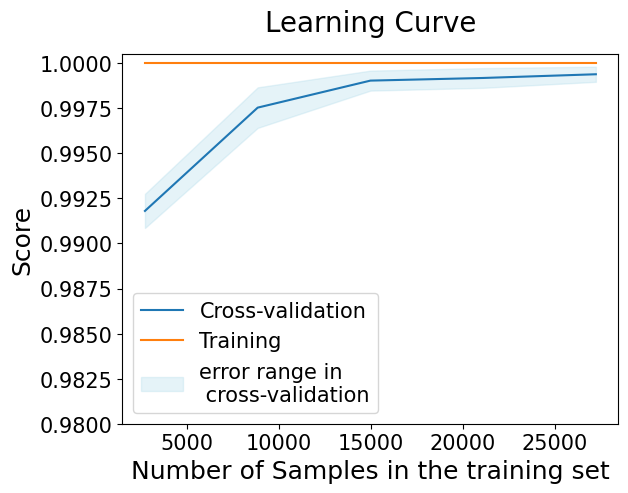

In [29]:
#calculating and plotting learning curve
display = LearningCurveDisplay(train_sizes = train_sizes, train_scores = train_scores,
                               test_scores = test_scores, score_name = "Score")

plt.plot(train_sizes, test_scores.mean(axis = 1), label = 'Cross-validation')
plt.plot(train_sizes, train_scores[:, 0], label = 'Training')


test_scores_err = test_scores.std(axis = 1)
test_scores_p = test_scores.mean(axis = 1) + test_scores_err
test_scores_m = test_scores.mean(axis = 1) - test_scores_err


plt.fill_between(train_sizes, test_scores_p, test_scores_m, color = '#abd9e9',
                 alpha = 0.3, label = 'error range in\n cross-validation')

plt.xlabel('Number of Samples in the training set', fontsize = 18)
plt.ylabel('Score', fontsize = 18)
plt.title('Learning Curve', fontsize = 20, y = 1.04)

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.ylim(.980, 1.0005)
plt.legend(fontsize = 15)

# plt.savefig('Learning curve.pdf', bbox_inches = 'tight', dpi = 1500)

plt.show()

### Cross-validation

Since, accuracy (mean) and weighted macro-accuracy (weighted macro-average) are same upto $6^{th}$ decimal place we can consider `mean` as a robust metric for estimating the accuracy for this ML model.

Ideal way of performing `cross-vallidaiton` (CV) would be by calculating weighted macro-average for all the CV techniques which is a tedious task. Despite the feature imbalances we have seen that `mean` is robust estimator for accuracy. So, we perform cross-validation on `mean` itself -- for which we have inbuilt modules in `sklearn` library -- without compromising the credibility of model analysis.

In [30]:
#accuracy
test_labels_array = test_labels.to_numpy()
test_labels_array = test_labels_array.reshape(-1, 1)
predict = predict.reshape(-1, 1)
out = np.concatenate((test_labels_array, predict), axis = 1)

mean_conv = np.mean(test_labels_array == predict) * 100.0
std_conv = np.std(test_labels_array == predict)

print(f'Accuracy: {mean_conv : 0.2f} % ({std_conv : 0.2f} %)')

Accuracy:  99.98 % ( 0.02 %)


In [31]:
#cross-validation
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [32]:
#K-fold CV
kfold = KFold(n_splits = 10, shuffle = True, random_state = 100)
results_kfold = model_selection.cross_val_score(rf, features, labels, cv = kfold)

mean_kfold = results_kfold.mean() * 100.0
std_kfold = results_kfold.std() * 100.0

print(f"Accuracy: {mean_kfold : .2f} % ({std_kfold : .2f} %)")

Accuracy:  99.96 % ( 0.03 %)


In [33]:
#Stratified K-fold CV
skfold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 100)
results_skfold = model_selection.cross_val_score(rf, features, labels, cv = skfold)

mean_skfold = results_skfold.mean() * 100.0
std_skfold = results_skfold.std() * 100.0

print(f"Accuracy: {mean_skfold : .2f} % ({std_skfold : .2f} %)")

Accuracy:  99.95 % ( 0.04 %)


In [34]:
#Repeated random test-train splits CV
kfold2 = model_selection.ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 100)
results_kfold2 = model_selection.cross_val_score(rf, features, labels, cv = kfold2)

mean_kfold2 = results_kfold2.mean() * 100.0
std_kfold2 = results_kfold2.std() * 100.0

print(f"Accuracy: {mean_kfold2 : .2f} % ({std_kfold2 : .2f} %)")

Accuracy:  99.96 % ( 0.02 %)


In [35]:
#plotting cross-validation results 
categories = ['K-fold\n cross-validation', 'Stratified K-fold\n cross-validation',
              'Repeated random\n test-train splits\n cross-validation']

mean_cv = np.array([mean_kfold, mean_skfold, mean_kfold2])
std_cv = np.array([std_kfold, std_skfold, std_kfold2])

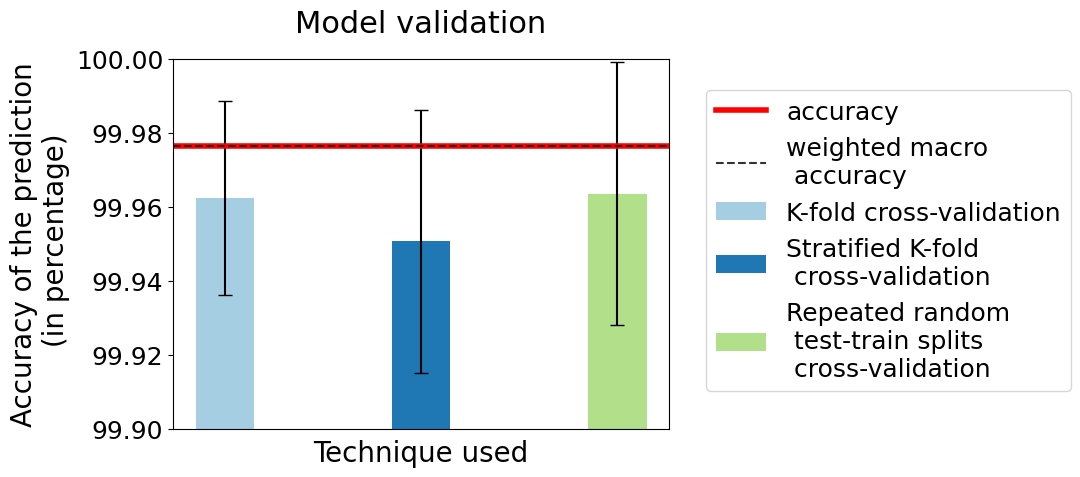

In [36]:
import matplotlib.pyplot as plt
plt.bar(categories[0], mean_cv[0], yerr = std_cv[0], color = '#a6cee3', width = 0.3, linewidth = 3,
        alpha = 1, align = 'center', capsize = 5, label = 'K-fold cross-validation')
plt.bar(categories[1], mean_cv[1], yerr = std_cv[1], color = '#1f78b4', width = 0.3, linewidth = 3,
        alpha = 1, align = 'center', capsize = 5, label = 'Stratified K-fold\n cross-validation')
plt.bar(categories[2], mean_cv[2], yerr = std_cv[1], color = '#b2df8a', width = 0.3, linewidth = 3,
        alpha = 1, align = 'center', capsize = 5, label = 'Repeated random\n test-train splits\n cross-validation')

plt.xlabel('Technique used', fontsize = 20)
plt.ylabel('Accuracy of the prediction\n (in percentage)', fontsize = 20)
plt.title('Model validation', fontsize = 22, y = 1.05)
plt.xticks(rotation = 35, fontsize = 12)

plt.axhline(y = mean_conv, ls = '-', linewidth = 4, color = 'red', label = 'accuracy')
plt.axhline(y = weighted_macro_accuracy * 100, ls = '--', color = 'black', label = 'weighted macro\n accuracy',
            alpha = 0.8)
plt.grid(False)
plt.legend(bbox_to_anchor =(1.05, .95), ncol = 1, fontsize = 18)
plt.ylim(99.9, 100)

plt.xticks([], fontsize = 18)
plt.yticks(fontsize = 18)

# plt.savefig('Cross-validation.pdf', bbox_inches = 'tight', dpi = 1500)
plt.show()

### Visualizing the confusion matrix graphically

# ⚠️

Then cells in which seaborn is imported run them in the last. Otherwise it will affect the other plot styling done using matplotlib throughout the notebook.

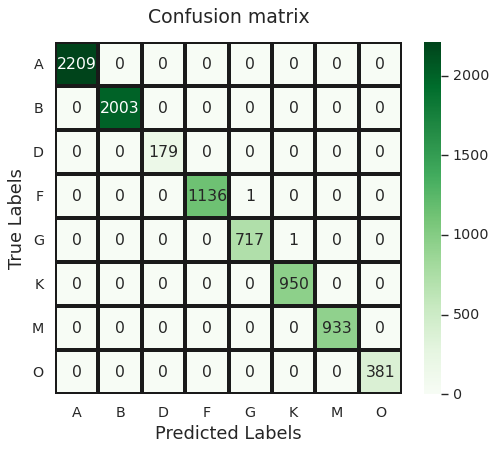

In [41]:
#Plotting the confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
sns.set(font_scale = 1.17)
cm = confusion_matrix(test_labels_array, predict, labels = rf.classes_)

axes_labels = ['A', 'B', 'D', 'F', 'G', 'K', 'M', 'O']

plt.figure(figsize = (7, 5.5))
sns.heatmap(cm, cmap = 'Greens', annot = True, fmt = 'g', linewidth = 2, linecolor = 'k',
            xticklabels = axes_labels, yticklabels = axes_labels)

plt.xlabel('Predicted Labels', fontsize = 16)
plt.ylabel('True Labels', fontsize = 16)
plt.title('Confusion matrix', y = 1.04, fontsize = 17)

plt.yticks(rotation = 0)
# plt.savefig('Confusion matrix 2.pdf', bbox_inches = 'tight', dpi = 1500)
plt.show()

### Extracting the classifcation report

In [37]:
from sklearn.metrics import classification_report
class_report = classification_report(test_labels_array, predict)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2209
           1       1.00      1.00      1.00      2003
           2       1.00      1.00      1.00       179
           3       1.00      1.00      1.00      1137
           4       1.00      1.00      1.00       718
           5       1.00      1.00      1.00       950
           6       1.00      1.00      1.00       933
           7       1.00      1.00      1.00       381

    accuracy                           1.00      8510
   macro avg       1.00      1.00      1.00      8510
weighted avg       1.00      1.00      1.00      8510



In [38]:
#storing the statistics from classification report into an array
precision = np.array([1, 1, 1, 1, 1, 1, 1, 1])
recall = np.array([1, 1, 1, 1, 1, 1, 1, 1])
f1_score = np.array([1, 1, 1, 1, 1, 1, 1, 1])

In [39]:
classes = np.array(['A', 'B', 'D', 'F', 'G', 'K', 'M', 'O'])

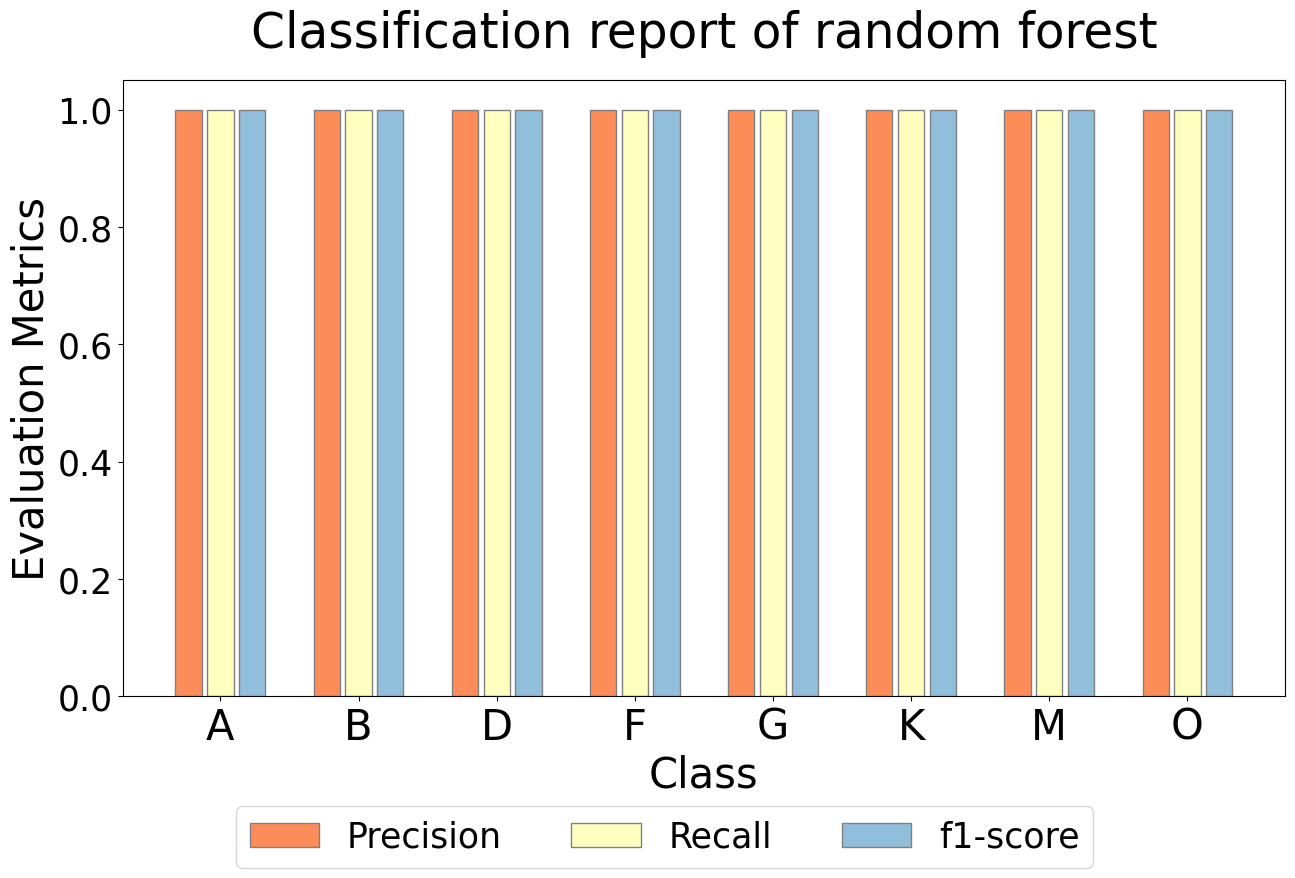

In [40]:
fig, ax = plt.subplots(figsize = (15, 8))

barwidth = 0.19

br1 = np.arange(len(classes))
br2 = [x + barwidth + 0.04 for x in br1]
br3 = [x + barwidth + 0.04 for x in br2]

ax.bar(br1, precision, width = barwidth, color ='#fc8d59', edgecolor = 'gray', label = 'Precision')
ax.bar(br2, recall, width = barwidth, color ='#ffffbf', edgecolor = 'gray', label = 'Recall')
ax.bar(br3, f1_score, width = barwidth, color ='#91bfdb', edgecolor = 'gray', label = 'f1-score')

ax.set_xlabel('Class', fontsize = 30)
ax.set_ylabel('Evaluation Metrics', fontsize = 30)
ax.set_title('Classification report of random forest', fontsize = 35, y = 1.04)

plt.xticks([r + barwidth + 0.04 for r in range(len(precision))], classes, fontsize = 30)
plt.yticks(fontsize = 25)
plt.legend(bbox_to_anchor =(0.85, -0.15), ncol = 3, fontsize = 25)

plt.ylim(0, 1.05)
plt.style.use('classic')
# plt.savefig('Classification report.pdf', bbox_inches = 'tight', dpi = 1500)
plt.show()